In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [2]:
train = pd.read_csv("Train.csv")
train.head()

,Monthly_Output_Tonnes,Yearly_Release_Count,CO2_Emissions,Water_Used_ML,Waste_To_Landfill_Tonnes,Avg_Worker_Wage_USD,Weekly_Work_Hours,Avg_fashion_item_Price
0,588.648594,17,11594.85374,191.264884,930.946232,86.021109,63,22.459343
1,419.410744,16,17049.04268,233.167384,802.147084,162.032022,56,16.283957
2,523.379827,7,7916.67980,212.169477,918.327579,42.024435,52,18.570310
3,202.911362,29,14981.41434,177.040708,903.096798,153.365509,51,14.158061
4,185.040996,15,12495.97073,153.809215,767.246025,125.304830,48,22.631940


In [3]:
train.shape

(15000, 8)

In [4]:
train.isnull().sum()

Monthly_Output_Tonnes       0
Yearly_Release_Count        0
CO2_Emissions               0
Water_Used_ML               0
Waste_To_Landfill_Tonnes    0
Avg_Worker_Wage_USD         0
Weekly_Work_Hours           0
Avg_fashion_item_Price      0
dtype: int64

In [5]:
train.duplicated().sum()

0

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Monthly_Output_Tonnes     15000 non-null  float64
 1   Yearly_Release_Count      15000 non-null  int64  
 2   CO2_Emissions             15000 non-null  float64
 3   Water_Used_ML             15000 non-null  float64
 4   Waste_To_Landfill_Tonnes  15000 non-null  float64
 5   Avg_Worker_Wage_USD       15000 non-null  float64
 6   Weekly_Work_Hours         15000 non-null  int64  
 7   Avg_fashion_item_Price    15000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 937.6 KB


In [7]:
test = pd.read_csv("Test.csv")
test.head()

,Monthly_Output_Tonnes,Yearly_Release_Count,CO2_Emissions,Water_Used_ML,Waste_To_Landfill_Tonnes,Avg_Worker_Wage_USD,Weekly_Work_Hours,Avg_fashion_item_Price
0,416.427313,26,12973.10315,205.068617,981.194258,134.407898,57,NaN
1,535.856742,8,10250.78653,190.365786,1024.857400,214.419836,41,NaN
2,196.137250,16,11754.92941,182.129182,696.759239,217.551386,55,NaN
3,418.432238,17,7902.26642,167.511985,617.092388,126.183107,48,NaN
4,496.369544,29,11866.33608,208.675372,795.154610,199.458920,65,NaN


In [8]:
test.shape

(200, 8)

In [9]:
test.isnull().sum()

Monthly_Output_Tonnes         0
Yearly_Release_Count          0
CO2_Emissions                 0
Water_Used_ML                 0
Waste_To_Landfill_Tonnes      0
Avg_Worker_Wage_USD           0
Weekly_Work_Hours             0
Avg_fashion_item_Price      200
dtype: int64

In [10]:
test.duplicated().sum()

0

<Axes: ylabel='Avg_fashion_item_Price'>

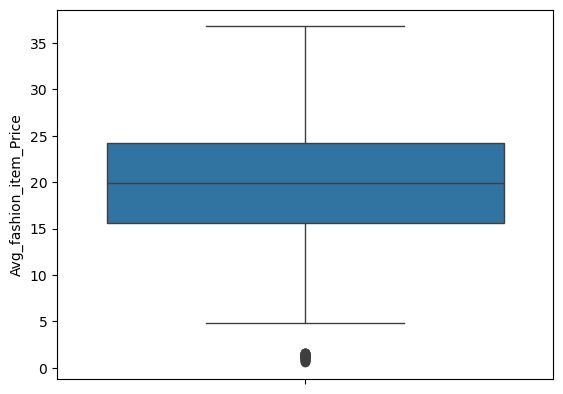

In [11]:
sns.boxplot(train['Avg_fashion_item_Price'])

In [12]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(15200, 8)

In [13]:
combined["Output_per_Release"] = combined["Monthly_Output_Tonnes"] / combined["Yearly_Release_Count"]
combined["CO2_per_Tonne"] = combined["CO2_Emissions"] / combined["Monthly_Output_Tonnes"]
combined["Water_per_Tonne"] = combined["Water_Used_ML"] / combined["Monthly_Output_Tonnes"]
combined["Waste_per_Tonne"] = combined["Waste_To_Landfill_Tonnes"] / combined["Monthly_Output_Tonnes"]
combined["Wage_per_Hour"] = combined["Avg_Worker_Wage_USD"] / combined["Weekly_Work_Hours"]
combined["Monthly_Labor_Cost_per_Tonne"] = (combined["Avg_Worker_Wage_USD"] * combined["Weekly_Work_Hours"] * 4.33) / combined["Monthly_Output_Tonnes"]
combined["CO2_per_Work_Hour"] = combined["CO2_Emissions"] / (combined["Weekly_Work_Hours"] * 4.33)
combined["Water_per_WageUSD"] = combined["Water_Used_ML"] / combined["Avg_Worker_Wage_USD"]

In [14]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Monthly_Output_Tonnes         15200 non-null  float64
 1   Yearly_Release_Count          15200 non-null  int64  
 2   CO2_Emissions                 15200 non-null  float64
 3   Water_Used_ML                 15200 non-null  float64
 4   Waste_To_Landfill_Tonnes      15200 non-null  float64
 5   Avg_Worker_Wage_USD           15200 non-null  float64
 6   Weekly_Work_Hours             15200 non-null  int64  
 7   Avg_fashion_item_Price        15000 non-null  float64
 8   Output_per_Release            15200 non-null  float64
 9   CO2_per_Tonne                 15200 non-null  float64
 10  Water_per_Tonne               15200 non-null  float64
 11  Waste_per_Tonne               15200 non-null  float64
 12  Wage_per_Hour                 15200 non-null  float64
 13  Monthly_

In [15]:
correlation_matrix = combined.corr()
target_corr = correlation_matrix["Avg_fashion_item_Price"].sort_values(ascending=False)
print(target_corr)

Avg_fashion_item_Price          1.000000
Yearly_Release_Count            0.044177
Water_per_WageUSD               0.029873
Waste_per_Tonne                 0.023915
Water_per_Tonne                 0.017095
Monthly_Labor_Cost_per_Tonne    0.016150
Weekly_Work_Hours               0.015990
Monthly_Output_Tonnes           0.015648
CO2_per_Tonne                   0.008875
Water_Used_ML                   0.007038
CO2_Emissions                   0.006625
Waste_To_Landfill_Tonnes       -0.002468
CO2_per_Work_Hour              -0.003941
Output_per_Release             -0.024442
Avg_Worker_Wage_USD            -0.032416
Wage_per_Hour                  -0.035010
Name: Avg_fashion_item_Price, dtype: float64


In [31]:
combined = combined.drop(['Waste_To_Landfill_Tonnes', 'CO2_per_Work_Hour', 'Output_per_Release', 'Avg_Worker_Wage_USD', 'Wage_per_Hour'], axis = 1)

In [33]:
newtrain = combined.iloc[0:15000, : ]
newtest = combined.iloc[15000:, :]
newtest = newtest.drop('Avg_fashion_item_Price', axis = 1)

In [35]:
newtrain.shape

(15000, 11)

In [37]:
newtest.shape

(200, 10)

In [39]:
x = newtrain.drop('Avg_fashion_item_Price', axis = 1)
y = newtrain['Avg_fashion_item_Price']

In [41]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
models = {'Logistic Regression': LinearRegression(), 'Random Forest': RandomForestRegressor(),
         'Bagging': BaggingRegressor(), 'Extra Tree': ExtraTreesRegressor(), 'LightGBM': LGBMRegressor(),
         'Gradient Boosting': GradientBoostingRegressor(), 'Adaboost': AdaBoostRegressor(),
         'XGB': XGBRegressor()}

In [47]:
def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        predictions = model.fit(X_train, y_train).predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        results[name] = rmse
    return results

In [49]:
results = evaluate_models(x_train, x_test, y_train, y_test, models)

C:\Users\ahpat\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2096
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 10
[LightGBM] [Info] Start training from score 19.915480


C:\Users\ahpat\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [50]:
best_model_name = min(results, key = results.get)
best_model = models[best_model_name]

In [51]:
print(f"best model is {best_model_name} with rmse {results[best_model_name]}")

best model is Extra Tree with rmse 0.5684197606065777


In [52]:
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [53]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.5586747511771523


In [59]:
x_train = newtrain.drop('Avg_fashion_item_Price', axis = 1)
y_train = newtrain['Avg_fashion_item_Price']
x_test = newtest
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [60]:
solution = pd.DataFrame({'Avg_fashion_item_Price' : y_pred})
solution.head()

,Avg_fashion_item_Price
0,15.259777
1,28.002577
2,22.095181
3,11.257597
4,30.457474


In [61]:
solution.to_csv('Solution.csv', index = False)